We will use sklearn module to implement decision tree algorithm . sklearn uses CART (Classification and Regression Trees) algorithm and by default it uses impurity as a criteria to split the nodes.

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np

#For datavisualiztion
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


import warnings
warnings.filterwarnings('ignore')
# For model prepration
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler


In [2]:
# Loading the dataset
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/wine.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5


In [3]:
data.shape

(1599, 13)

In [4]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

There is no null values found in the dataset

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


We have categorical feature **Alcohol_content**, so we use ordinal encoder since it has order category such as Low, Medium, High to convert into numerical values [0,1,2].

In [6]:
from sklearn.preprocessing import OrdinalEncoder

In [7]:
df=OrdinalEncoder(categories=[['Low','Medium','High']])
df1=df.fit_transform(data[['Alcohol_content']])
df1

array([[0.],
       [1.],
       [1.],
       ...,
       [2.],
       [1.],
       [2.]])

In [8]:
data['Alcohol_content']=df1

# Heatmap
* Finding out the relation between the feature.
* Since it ranges from (-1,1), we consider good which the features are near to -1 and 1, but it should not be near to 0.
* Lets find the multicollinearity with the correlation matrix

In [9]:
df_corr=data.corr().abs()

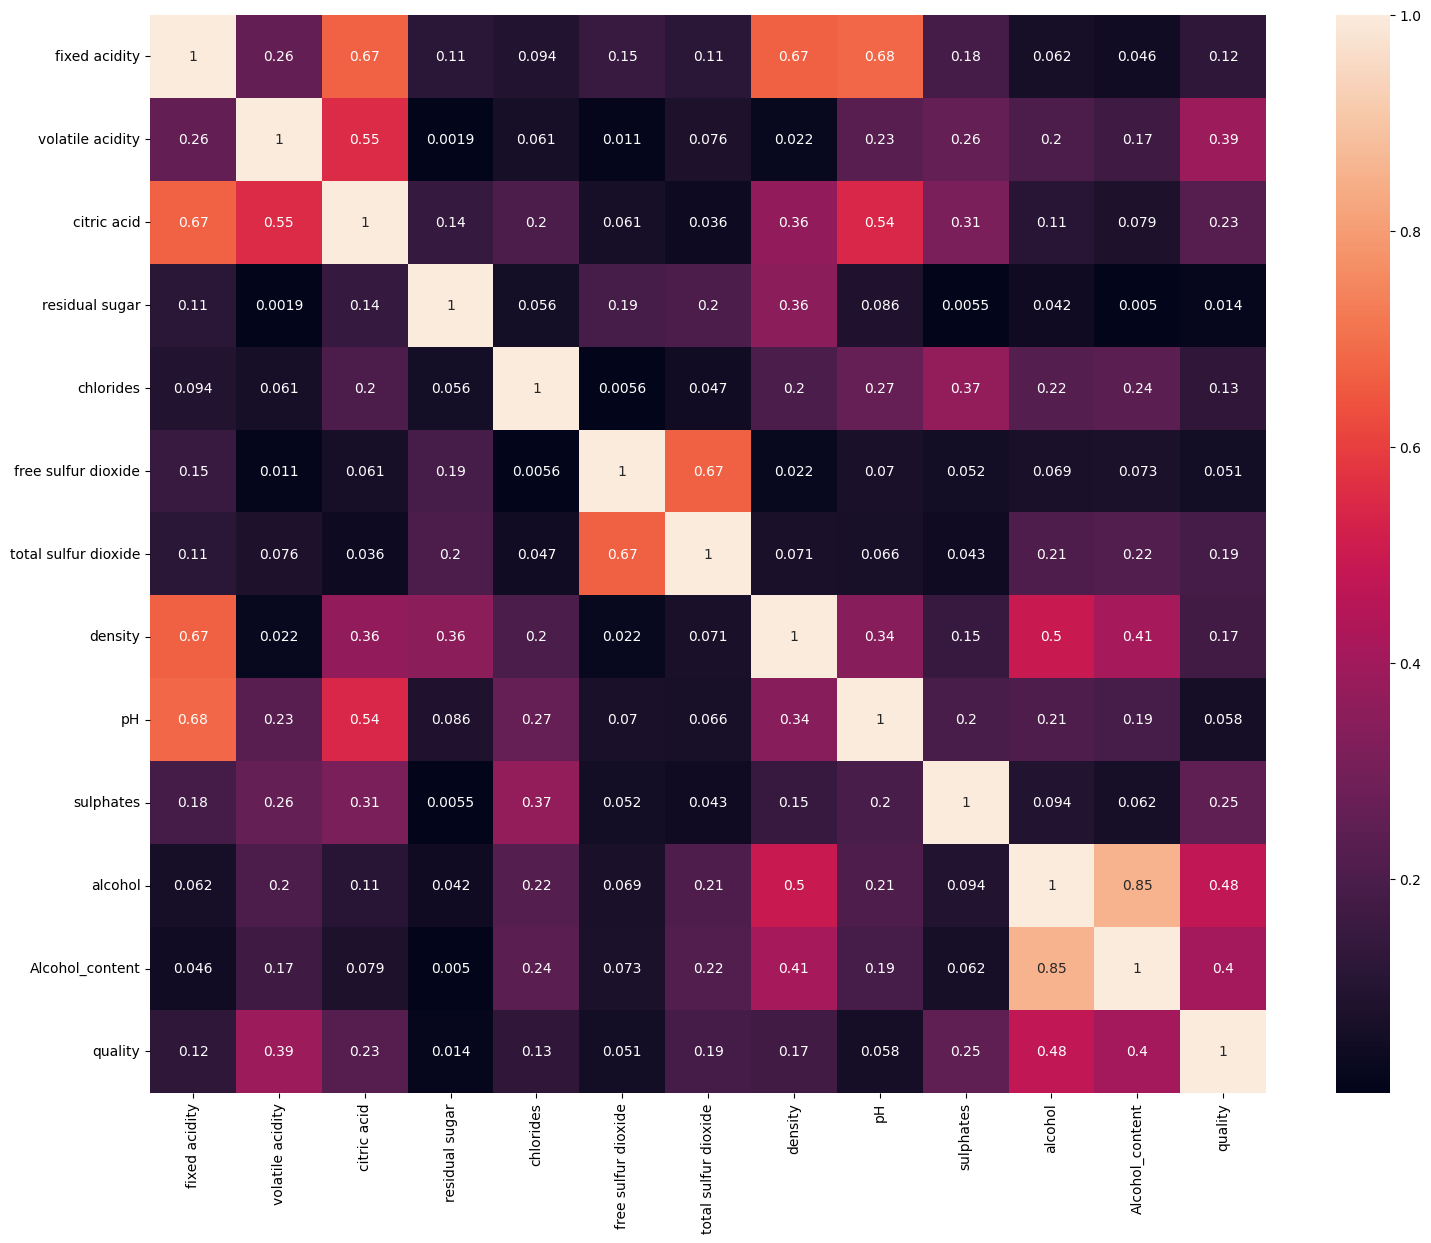

In [10]:
plt.figure(figsize=(18,14))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

Alcohol_content and Alcohol are correlated as per above heat map.

we'll confirm with the the scatter plot.

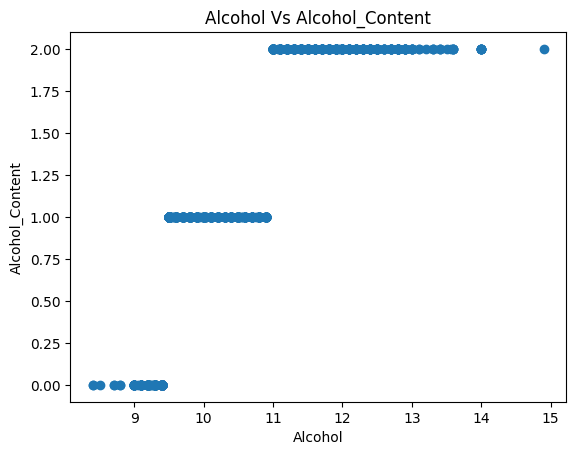

In [11]:
plt.scatter(data.alcohol,data.Alcohol_content)
plt.xlabel('Alcohol')
plt.ylabel('Alcohol_Content')
plt.title('Alcohol Vs Alcohol_Content')
plt.show()

When alcohol level increases alcohol content also increases. Since these two are best features we'll one feature to avoid multicollinearity problem.

Lets build Decision tree model, since it is a classification  problem, we use DecisionTree Classifier to build model

#Train and Test Split

* Split the data to features and target and assign x and y variable
* Do train test split for splitting the data to training set and testing set

In [12]:
# Remove  the 'Alcohol_content' feature from prediction and set quality as the target variable.
x = data.drop(columns=['Alcohol_content', 'quality'])
y = data.quality


In [13]:
#Lets split the data into a train test spli
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=94255)

There is no need of standardizing the data, because Decision tree has its own builtin scaling techniques like sqrt, log to train the model

In [14]:
#Intiate DecisionTressClassifier with new parameter and train

cnn=DecisionTreeClassifier()

In [15]:
#Traib the model
cnn.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
def metrics_score(cnn,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=cnn.predict(x_train)
        print("==================Training Score=================")
        print("Accuracy Score == >  ", accuracy_score(y_train,y_pred)*100)
    elif train==False:
        pred=cnn.predict(x_test)
        print("=================Test Score======================")
        print("Accuracy Score==>  ",accuracy_score(y_test,pred)*100)
        print("Classification Report",classification_report(y_test,pred))


In [20]:
#checking train and test score
metrics_score(cnn,x_train,x_test,y_train,y_test,train=True)
metrics_score(cnn,x_train,x_test,y_train,y_test,train=False)

==================Training Score=================
Accuracy Score == >   100.0
=================Test Score======================
Accuracy Score==>   61.0
Classification Report               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        11
           5       0.67      0.72      0.70       166
           6       0.62      0.58      0.60       160
           7       0.53      0.54      0.54        57
           8       0.00      0.00      0.00         5

    accuracy                           0.61       400
   macro avg       0.30      0.31      0.31       400
weighted avg       0.60      0.61      0.61       400



From the classification metrics we found that the model is overfitted training as 100% and testing as 61%.

# HYPERPARAMETER TUNING

* Since the model is overfitted, we tune the parameters by ***GridSearchCV***
* GridSearchCV helps in selecting the best criterion, best min leaf sample, best max tree depth, by pruning the tree.
* This helps to avoid the model overfitting.

In [26]:
grid_param={
    'criterion':['ginni','entropy'],
    'max_depth': range(10,15),
    'min_samples_leaf':range(2,6),
    'min_samples_split':range(3,8),
    'max_leaf_nodes':range(5,10),}



In [27]:
grid_search=GridSearchCV(estimator=cnn,
                         param_grid=grid_param,
                         cv=5,
                        n_jobs=-1)


In [28]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [29]:
best_parameter=grid_search.best_params_
print(best_parameter)

{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [30]:
# Fitting the model with the best parameters of Grid Search CV .

cnn=DecisionTreeClassifier(criterion='entropy',max_depth=10,max_leaf_nodes=9,min_samples_split= 3)

In [31]:
cnn.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=9,
                       min_samples_split=3)

In [32]:
#Call the function and pass dataset to check train and test score
metrics_score(cnn,x_train,x_test,y_train,y_test,train=True)
metrics_score(cnn,x_train,x_test,y_train,y_test,train=False)

==================Training Score=================
Accuracy Score == >   60.80066722268557
=================Test Score======================
Accuracy Score==>   56.99999999999999
Classification Report               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        11
           5       0.69      0.65      0.67       166
           6       0.52      0.62      0.56       160
           7       0.49      0.37      0.42        57
           8       0.00      0.00      0.00         5

    accuracy                           0.57       400
   macro avg       0.28      0.27      0.28       400
weighted avg       0.56      0.57      0.56       400



[Text(0.4666666666666667, 0.9, 'x[10] <= 10.525\nentropy = 1.71\nsamples = 1199\nvalue = [9, 42, 515, 478, 142, 13]'),
 Text(0.2, 0.7, 'x[9] <= 0.555\nentropy = 1.396\nsamples = 742\nvalue = [7, 25, 439, 243, 26, 2]'),
 Text(0.13333333333333333, 0.5, 'entropy = 1.11\nsamples = 253\nvalue = [3, 15, 185, 50, 0, 0]'),
 Text(0.26666666666666666, 0.5, 'x[1] <= 0.417\nentropy = 1.449\nsamples = 489\nvalue = [4, 10, 254, 193, 26, 2]'),
 Text(0.13333333333333333, 0.3, 'x[9] <= 0.665\nentropy = 1.549\nsamples = 126\nvalue = [0, 1, 42, 65, 16, 2]'),
 Text(0.06666666666666667, 0.1, 'entropy = 0.99\nsamples = 50\nvalue = [0, 0, 28, 22, 0, 0]'),
 Text(0.2, 0.1, 'entropy = 1.608\nsamples = 76\nvalue = [0, 1, 14, 43, 16, 2]'),
 Text(0.4, 0.3, 'x[10] <= 9.85\nentropy = 1.33\nsamples = 363\nvalue = [4, 9, 212, 128, 10, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 1.133\nsamples = 236\nvalue = [2, 6, 158, 69, 1, 0]'),
 Text(0.4666666666666667, 0.1, 'entropy = 1.531\nsamples = 127\nvalue = [2, 3, 54, 

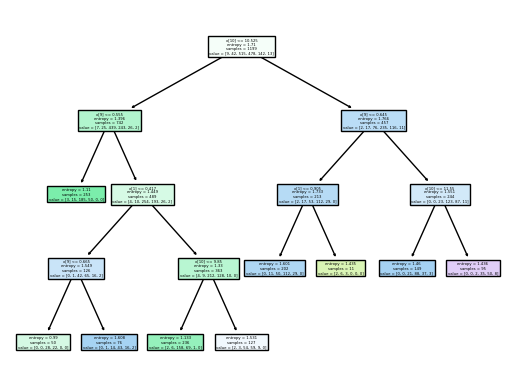

In [36]:
from sklearn.tree import plot_tree
plot_tree(cnn, filled="True")


Now Accuracy Score of Train and test is not overfitted and the model performed better.